In [82]:
import numpy as np
import scipy.stats as st

def cis(boot: np.ndarray, theta_hat: float, se_boot: float, alpha: float = 0.05):
    z = st.norm.ppf(1 - alpha/2)

    quantile_low = np.quantile(boot, alpha/2)
    quantile_top = np.quantile(boot, 1 - alpha/2)

    # Normal CI
    normal_ci = (theta_hat - z*se_boot, theta_hat + z*se_boot)

    # Percentile CI
    percentile_ci = (quantile_low, quantile_top)

    # Pivotal CI
    pivotal_ci = (2*theta_hat - quantile_top, 2*theta_hat - quantile_low)

    return normal_ci, percentile_ci, pivotal_ci

mu = 5
sigma = 1
n = 100
B = 1_000_000

X: np.ndarray = st.norm.rvs(loc=mu, scale=sigma, size=n)
theta_hat = np.exp(X.mean())
print(theta_hat)

# Bootstrap
rng = np.random.default_rng(42)
xx = rng.choice(X, size=(B,n), replace=True)
boot: np.ndarray = np.exp( xx.mean(axis=1) )
se_boot = boot.std()
print(se_boot)

# Confidence intervals
for ci in cis(boot, theta_hat, se_boot):
    print(ci)

143.11502769002257
14.187210719426364
(115.30860563886631, 170.92144974117883)
(117.88834149450072, 173.39527714490848)
(112.83477823513667, 168.34171388554444)


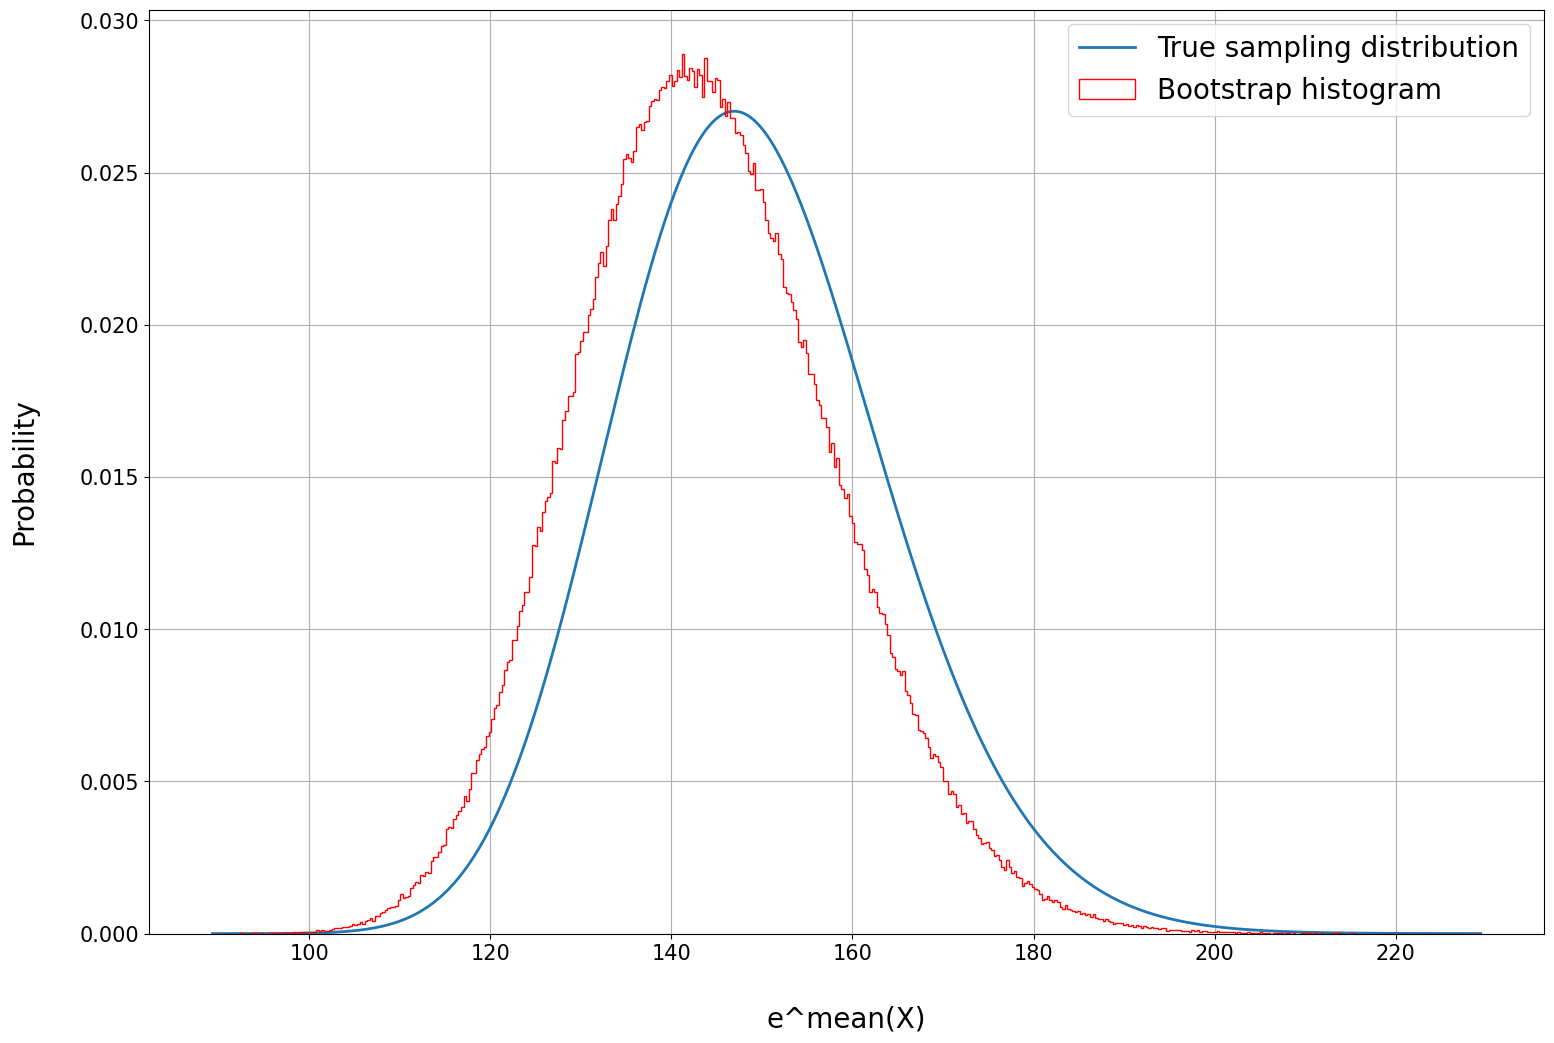

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

bins = 500
tt = np.linspace(boot.min(), boot.max(), bins)

# Generate the CDF for theta, calculate it for each bin, and include the differences between bins
sigma_theta = 1 / np.sqrt(n)

theta_cdf: np.ndarray = st.norm.cdf(np.log(tt), loc=mu, scale=sigma_theta)
theta_pdf: np.ndarray = np.gradient(theta_cdf, tt)

font_size = 20
label_pad = 30

plt.figure(figsize=(18, 12))
plt.plot(tt, theta_pdf, linewidth=2)
plt.hist(boot, bins=bins, density=True, histtype='step', color='r')

plt.legend(['True sampling distribution', 'Bootstrap histogram'], fontsize=font_size)

plt.xticks(fontsize=0.75*font_size)
plt.yticks(fontsize=0.75*font_size)

plt.xlabel('theta', fontsize=font_size, labelpad=label_pad)
plt.ylabel('Probability', fontsize=font_size, labelpad=label_pad)

plt.grid()
plt.show()

In [84]:
%reset -f

: 